<a href="https://colab.research.google.com/github/Coreym6/HelloAI/blob/main/Assign8_part1_gan_pytorch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# create and train a pytorch digit classifier
# source: chatgpt with the prompt "create a pytorch mnist digit classifier"
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# Set a flag to indicate whether we are (re)-training the model
# or loading an already trained model
PATH = "/content/drive/MyDrive/models/classifier-digits.pt"
loadmodel = False

# Set device to either CUDA or CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = torch.device("xla")

# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.dropout = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = nn.functional.relu(nn.functional.max_pool2d(self.conv1(x), 2))
        x = nn.functional.relu(nn.functional.max_pool2d(self.dropout(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return nn.functional.log_softmax(x, dim=1)

if loadmodel:
  model = Net()
  model.load_state_dict(torch.load(PATH))
  model = model.to(device)
  model.eval()

else:
  # Create an instance of the model and send it to the device
  model = Net().to(device)

  # Load the MNIST dataset and apply transformations
  transform = transforms.Compose([
      transforms.ToTensor(),
      transforms.Normalize((0.1307,), (0.3081,))
  ])

  train_set = datasets.MNIST('../data', train=True, download=True, transform=transform)
  test_set = datasets.MNIST('../data', train=False, download=True, transform=transform)

  # Set batch size and create data loaders
  batch_size = 64

  train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
  test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)


  # Define the optimizer and loss function
  optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
  criterion = nn.CrossEntropyLoss()

  # Train the model
  num_epochs = 2

  for epoch in range(num_epochs):
      model.train()
      for batch_idx, (data, target) in enumerate(train_loader):
          data, target = data.to(device), target.to(device)
          optimizer.zero_grad()
          output = model(data)
          loss = criterion(output, target)
          loss.backward()
          optimizer.step()
          if batch_idx % 100 == 0:
              print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                  epoch, batch_idx * len(data), len(train_loader.dataset),
                  100. * batch_idx / len(train_loader), loss.item()))

      model.eval()
      test_loss = 0
      correct = 0
      with torch.no_grad():
          for data, target in test_loader:
              data, target = data.to(device), target.to(device)
              output = model(data)
              test_loss += criterion(output, target).item()
              pred = output.argmax(dim=1, keepdim=True)
              correct += pred.eq(target.view_as(pred)).sum().item()

      test_loss /= len(test_loader.dataset)
      print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
          test_loss, correct, len(test_loader.dataset),
          100. * correct / len(test_loader.dataset)))    
  torch.save(model.state_dict(), PATH)


Train Epoch: 0 [0/60000 (0%)]	Loss: 2.314107
Train Epoch: 0 [6400/60000 (11%)]	Loss: 1.839192
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.822086
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.370960
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.428920
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.422471
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.216169
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.338789
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.346144
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.269121
Test set: Average loss: 0.0025, Accuracy: 9513/10000 (95%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.460533
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.154898
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.074563
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.218494
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.085795
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.208407
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.243526
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.153296
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.243852
Tr

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Epoch [1/10] Batch [1/469] Discriminator Loss: 1.4143 Generator Loss: 0.7032
Epoch [1/10] Batch [101/469] Discriminator Loss: 0.3304 Generator Loss: 1.8161
Epoch [1/10] Batch [201/469] Discriminator Loss: 0.6190 Generator Loss: 1.9375
Epoch [1/10] Batch [301/469] Discriminator Loss: 1.0404 Generator Loss: 1.0041
Epoch [1/10] Batch [401/469] Discriminator Loss: 1.1834 Generator Loss: 0.5500


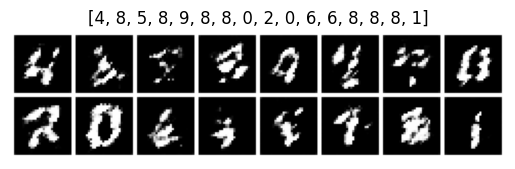

average prediction confidence over 100 predictions: 0.3830623924732208
prediction counts: [5, 7, 7, 12, 4, 6, 16, 7, 32, 4]
epoch time: 18.18949246406555, total time: 18.18949246406555
Epoch [2/10] Batch [1/469] Discriminator Loss: 1.1745 Generator Loss: 0.7688
Epoch [2/10] Batch [101/469] Discriminator Loss: 1.1763 Generator Loss: 0.9367
Epoch [2/10] Batch [201/469] Discriminator Loss: 1.1508 Generator Loss: 1.0189
Epoch [2/10] Batch [301/469] Discriminator Loss: 1.1212 Generator Loss: 0.6783
Epoch [2/10] Batch [401/469] Discriminator Loss: 1.0884 Generator Loss: 1.0712


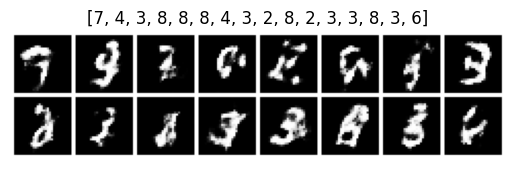

average prediction confidence over 100 predictions: 0.36112913489341736
prediction counts: [9, 7, 15, 33, 7, 20, 22, 13, 59, 15]
epoch time: 18.454041719436646, total time: 36.6435341835022
Epoch [3/10] Batch [1/469] Discriminator Loss: 1.1106 Generator Loss: 1.3039
Epoch [3/10] Batch [101/469] Discriminator Loss: 1.0342 Generator Loss: 1.2672
Epoch [3/10] Batch [201/469] Discriminator Loss: 0.9945 Generator Loss: 0.8931
Epoch [3/10] Batch [301/469] Discriminator Loss: 0.9828 Generator Loss: 1.0183
Epoch [3/10] Batch [401/469] Discriminator Loss: 0.9862 Generator Loss: 1.1595


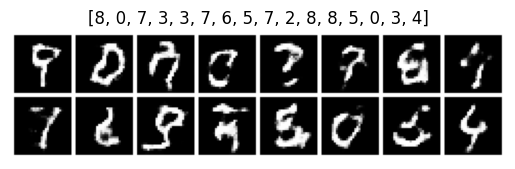

average prediction confidence over 100 predictions: 0.43545591831207275
prediction counts: [14, 12, 21, 46, 14, 27, 34, 26, 82, 24]
epoch time: 18.69552445411682, total time: 55.33905863761902
Epoch [4/10] Batch [1/469] Discriminator Loss: 0.9615 Generator Loss: 1.3839
Epoch [4/10] Batch [101/469] Discriminator Loss: 1.0926 Generator Loss: 0.7447
Epoch [4/10] Batch [201/469] Discriminator Loss: 1.0584 Generator Loss: 0.8056
Epoch [4/10] Batch [301/469] Discriminator Loss: 1.0497 Generator Loss: 0.8009
Epoch [4/10] Batch [401/469] Discriminator Loss: 1.1226 Generator Loss: 1.2251


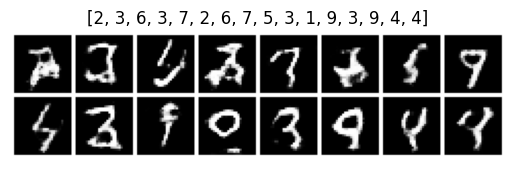

average prediction confidence over 100 predictions: 0.4277869462966919
prediction counts: [14, 19, 31, 61, 18, 36, 44, 42, 98, 37]
epoch time: 19.273239135742188, total time: 74.6122977733612
Epoch [5/10] Batch [1/469] Discriminator Loss: 1.0859 Generator Loss: 0.9204
Epoch [5/10] Batch [101/469] Discriminator Loss: 1.0761 Generator Loss: 0.8499
Epoch [5/10] Batch [201/469] Discriminator Loss: 1.0811 Generator Loss: 0.7080
Epoch [5/10] Batch [301/469] Discriminator Loss: 1.1240 Generator Loss: 0.8320
Epoch [5/10] Batch [401/469] Discriminator Loss: 1.1089 Generator Loss: 0.9426


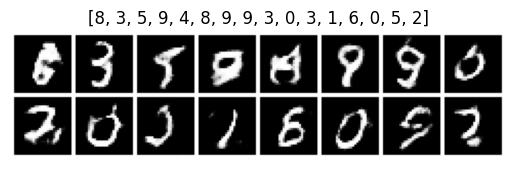

average prediction confidence over 100 predictions: 0.447194367647171
prediction counts: [17, 25, 36, 74, 31, 44, 55, 48, 115, 55]
epoch time: 18.25127410888672, total time: 92.86357188224792
Epoch [6/10] Batch [1/469] Discriminator Loss: 1.0880 Generator Loss: 1.0293
Epoch [6/10] Batch [101/469] Discriminator Loss: 1.1701 Generator Loss: 0.6722
Epoch [6/10] Batch [201/469] Discriminator Loss: 1.1025 Generator Loss: 1.0278
Epoch [6/10] Batch [301/469] Discriminator Loss: 1.1453 Generator Loss: 0.7131
Epoch [6/10] Batch [401/469] Discriminator Loss: 1.1161 Generator Loss: 0.7737


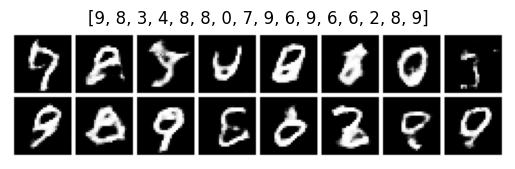

average prediction confidence over 100 predictions: 0.45364710688591003
prediction counts: [24, 34, 38, 81, 36, 58, 64, 60, 135, 70]
epoch time: 18.61049509048462, total time: 111.47406697273254
Epoch [7/10] Batch [1/469] Discriminator Loss: 1.1569 Generator Loss: 0.6902
Epoch [7/10] Batch [101/469] Discriminator Loss: 1.1418 Generator Loss: 1.3644
Epoch [7/10] Batch [201/469] Discriminator Loss: 1.1855 Generator Loss: 0.6689
Epoch [7/10] Batch [301/469] Discriminator Loss: 1.0579 Generator Loss: 1.1816
Epoch [7/10] Batch [401/469] Discriminator Loss: 1.0785 Generator Loss: 1.3001


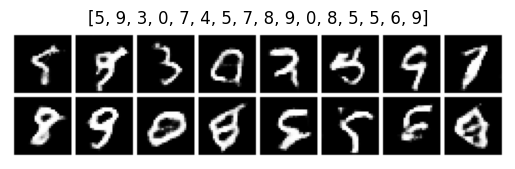

average prediction confidence over 100 predictions: 0.48897844552993774
prediction counts: [31, 39, 42, 92, 44, 75, 76, 68, 153, 80]
epoch time: 17.781795024871826, total time: 129.25586199760437
Epoch [8/10] Batch [1/469] Discriminator Loss: 1.0924 Generator Loss: 0.6694
Epoch [8/10] Batch [101/469] Discriminator Loss: 1.1374 Generator Loss: 0.7351
Epoch [8/10] Batch [201/469] Discriminator Loss: 1.1126 Generator Loss: 0.7442
Epoch [8/10] Batch [301/469] Discriminator Loss: 1.0606 Generator Loss: 1.2982
Epoch [8/10] Batch [401/469] Discriminator Loss: 1.0980 Generator Loss: 0.9916


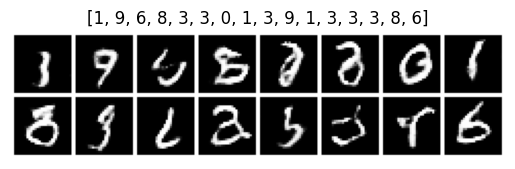

average prediction confidence over 100 predictions: 0.45005694031715393
prediction counts: [39, 51, 51, 103, 47, 79, 89, 82, 170, 89]
epoch time: 17.74420142173767, total time: 147.00006341934204
Epoch [9/10] Batch [1/469] Discriminator Loss: 1.0187 Generator Loss: 0.8452
Epoch [9/10] Batch [101/469] Discriminator Loss: 1.0575 Generator Loss: 0.8179
Epoch [9/10] Batch [201/469] Discriminator Loss: 1.1019 Generator Loss: 0.7500
Epoch [9/10] Batch [301/469] Discriminator Loss: 1.0198 Generator Loss: 1.1770
Epoch [9/10] Batch [401/469] Discriminator Loss: 1.0368 Generator Loss: 1.2870


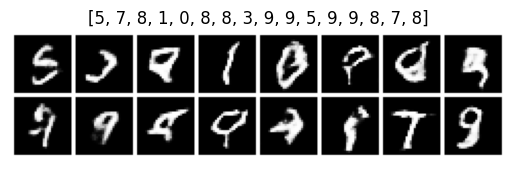

average prediction confidence over 100 predictions: 0.4465494453907013
prediction counts: [43, 59, 59, 117, 53, 91, 94, 93, 190, 101]
epoch time: 18.9650559425354, total time: 165.96511936187744
Epoch [10/10] Batch [1/469] Discriminator Loss: 1.0085 Generator Loss: 1.3790
Epoch [10/10] Batch [101/469] Discriminator Loss: 1.0580 Generator Loss: 1.4657
Epoch [10/10] Batch [201/469] Discriminator Loss: 1.1141 Generator Loss: 0.6874
Epoch [10/10] Batch [301/469] Discriminator Loss: 1.0433 Generator Loss: 0.6794
Epoch [10/10] Batch [401/469] Discriminator Loss: 0.9956 Generator Loss: 1.1381


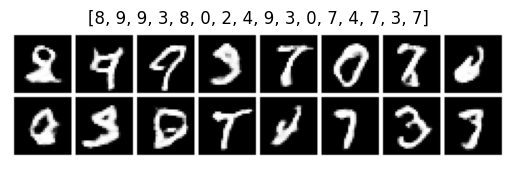

average prediction confidence over 100 predictions: 0.4681030213832855
prediction counts: [51, 64, 63, 131, 60, 102, 100, 104, 210, 115]
epoch time: 18.133787631988525, total time: 184.09890699386597


In [5]:
#OK now we have a good model for analyzing the output from our GAN
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# flag for saving/loading
PATH_G = "/content/drive/MyDrive/models/generator-digits.pt"
PATH_D = "/content/drive/MyDrive/models/discriminator-digits.pt"
loadgan = False

# Set random seed for reproducibility
torch.manual_seed(42)

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.fc = nn.Linear(100, 7 * 7 * 128)
        self.conv1 = nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1)
        self.conv2 = nn.ConvTranspose2d(64, 1, kernel_size=4, stride=2, padding=1)

        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.fc(x)
        x = x.view(-1, 128, 7, 7)
        x = self.relu(self.conv1(x))
        x = self.tanh(self.conv2(x))
        return x

# Define the discriminator network
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.conv1 = nn.Conv2d(1, 64, kernel_size=4, stride=2, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1)
        self.fc = nn.Linear(7 * 7 * 128, 1)

        self.relu = nn.LeakyReLU(0.2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = x.view(-1, 7 * 7 * 128)
        x = self.sigmoid(self.fc(x))
        return x

# Instantiate the generator and discriminator networks
generator = Generator()
discriminator = Discriminator()

if loadgan:
  generator.load_state_dict(torch.load(PATH_G))
  generator = generator.to(device)
  generator.eval()
  discriminator.load_state_dict(torch.load(PATH_D))
  discriminator = discriminator.to(device)
  discriminator.eval()

else:
  # Define the loss function and optimizer
  criterion = nn.BCELoss()
  generator_optimizer = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
  discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

  # Load the dataset
  transform = transforms.Compose([
      transforms.ToTensor(),
      transforms.Normalize((0.5,), (0.5,))
  ])
  dataset = datasets.MNIST('data', train=True, download=True, transform=transform)
  dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

  # Define the number of epochs and the device to use
  num_epochs = 10
  device = torch.device('cuda')

  # Move the generator and discriminator networks to the device
  generator.to(device)
  discriminator.to(device)

  # Train the generator and discriminator networks
  time_total = 0
  d_losses = []
  g_losses = []
  counts = [0]*10
  confidences = []
  for epoch in range(num_epochs):
      time_epoch = 0
      start = time.time()
      for i, (real_images, _) in enumerate(dataloader):
          batch_size = real_images.shape[0]
          real_labels = torch.ones(batch_size, 1, device=device)
          fake_labels = torch.zeros(batch_size, 1, device=device)

          # Train the discriminator network
          discriminator_optimizer.zero_grad()
          real_images = real_images.to(device)
          real_outputs = discriminator(real_images)
          real_loss = criterion(real_outputs, real_labels)

          noise = torch.randn(batch_size, 100, device=device)
          fake_images = generator(noise)
          fake_outputs = discriminator(fake_images.detach())
          fake_loss = criterion(fake_outputs, fake_labels)

          discriminator_loss = real_loss + fake_loss
          discriminator_loss.backward()
          discriminator_optimizer.step()

          # Train the generator network
          generator_optimizer.zero_grad()
          noise = torch.randn(batch_size, 100, device=device)
          fake_images = generator(noise)
          fake_outputs = discriminator(fake_images)
          generator_loss = criterion(fake_outputs, real_labels)
          generator_loss.backward()
          generator_optimizer.step()

          # Print the loss statistics
          if i % 100 == 0:
              print(f'Epoch [{epoch+1}/{num_epochs}] Batch [{i+1}/{len(dataloader)}] '
                    f'Discriminator Loss: {discriminator_loss.item():.4f} '
                    f'Generator Loss: {generator_loss.item():.4f}')

      # Generate 100 samples and count how many of each digit 
      with torch.no_grad():
          # Define the fixed noise vector for generating samples
          sample_noise = torch.randn(100, 100, device=device)
          generated_images = generator(sample_noise)
          generated_images = 0.5 * (generated_images + 1)
          output = model(generated_images)
          pred = output.argmax(dim=1, keepdim=True)
          grid = make_grid(generated_images[:16].cpu(), nrow=8, pad_value=1)
          plt.imshow(grid.permute(1, 2, 0))
          plt.axis('off')
          plt.title([int(pred[x]) for x in range(16)])
          plt.show()
          #print(torch.exp(output[0])) # torch.exp converts the output back into regular softmax probabilities (confidences)
          avg_conf = torch.mean(torch.exp(output).max(dim=1).values)
          confidences.append(avg_conf)
          for p in pred:
              counts[p] += 1

      g_losses.append(generator_loss.item())
      d_losses.append(discriminator_loss.item())
      time_epoch = time.time() - start
      time_total += time_epoch
      print(f"average prediction confidence over 100 predictions: {avg_conf}")
      print(f"prediction counts: {counts}")
      print(f"epoch time: {time_epoch}, total time: {time_total}")
        
      torch.save(generator.state_dict(), PATH_G)
      torch.save(discriminator.state_dict(), PATH_D)


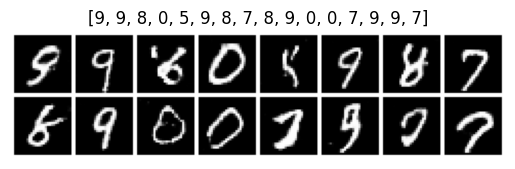

In [ ]:
import matplotlib.pyplot as plt
with torch.no_grad():
  # Define the fixed noise vector for generating samples
  sample_noise = torch.randn(100, 100, device=device)
  generated_images = generator(sample_noise)
  generated_images = 0.5 * (generated_images + 1)
  output = model(generated_images)
  pred = output.argmax(dim=1, keepdim=True)
  grid = make_grid(generated_images[:16].cpu(), nrow=8, pad_value=1)
  plt.imshow(grid.permute(1, 2, 0))
  plt.axis('off')
  plt.title([int(pred[x]) for x in range(16)])
  plt.show()
  #print(torch.exp(output[0])) # torch.exp converts th



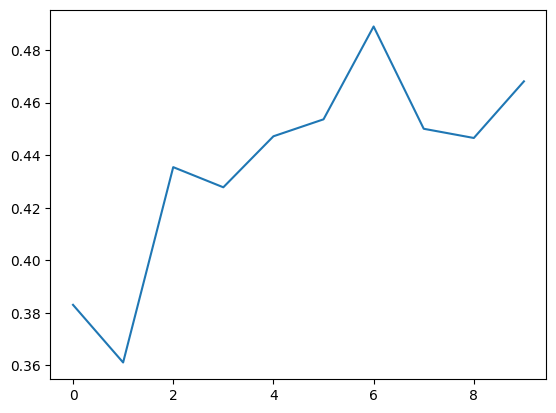

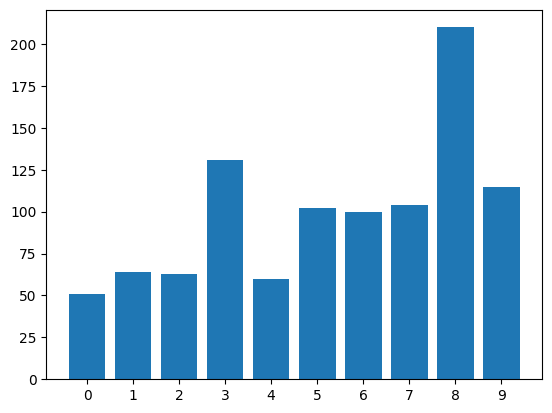

In [7]:
import matplotlib.pyplot as plt

plt.plot([c.cpu() for c in confidences])
plt.show()
plt.bar([f"{x}" for x in range(10)], counts)
plt.show()
